<a href="https://colab.research.google.com/github/skardec/deeply_kardec/blob/main/optimize_curve_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from scipy.optimize import curve_fit

In [3]:

# =====================================
# 1. Dataset e histograma
# =====================================
digits = load_digits()
data = digits.data.flatten()  # todos os pixels em vetor
hist, bin_edges = np.histogram(data, bins=17, range=(0, 16), density=True)

# usar centro dos bins como x
x = (bin_edges[:-1] + bin_edges[1:]) / 2
y = hist

In [4]:

# =====================================
# 2. Modelos para ajuste
# =====================================
def modelo_exponencial(x, a, b, c):
    return c * np.exp(-(a * x**2 + b))

def modelo_quadratico(x, a, b, c):
    return a * x**2 + b * x + c

def modelo_senoidal(x, a, b, c):
    return a * np.sin(b * x + c)

In [5]:
# =====================================
# 3. Ajustes
# =====================================
params_exp, _ = curve_fit(modelo_exponencial, x, y, p0=[0.1, 0.1, 0.1])
params_quad, _ = curve_fit(modelo_quadratico, x, y, p0=[-0.01, 0.01, 0.1])
params_sin, _ = curve_fit(modelo_senoidal, x, y, p0=[0.1, 0.5, 0.1])

# predições
y_exp = modelo_exponencial(x, *params_exp)
y_quad = modelo_quadratico(x, *params_quad)
y_sin = modelo_senoidal(x, *params_sin)

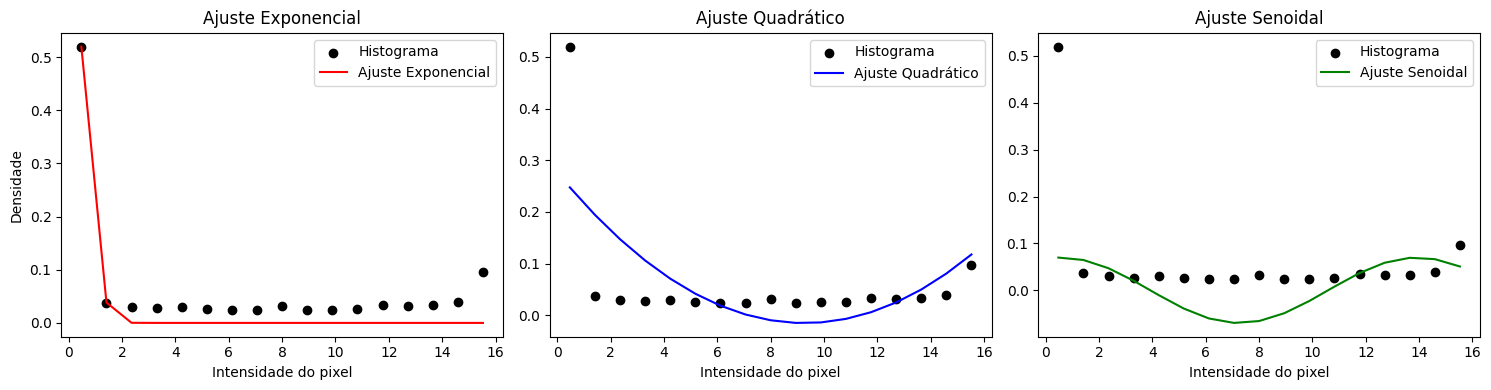

In [6]:






# =====================================
# 4. Plots
# =====================================
plt.figure(figsize=(15, 4))

# Exponencial
plt.subplot(1, 3, 1)
plt.scatter(x, y, label="Histograma", color="black")
plt.plot(x, y_exp, label="Ajuste Exponencial", color="red")
plt.title("Ajuste Exponencial")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Densidade")
plt.legend()

# Quadrático
plt.subplot(1, 3, 2)
plt.scatter(x, y, label="Histograma", color="black")
plt.plot(x, y_quad, label="Ajuste Quadrático", color="blue")
plt.title("Ajuste Quadrático")
plt.xlabel("Intensidade do pixel")
plt.legend()

# Senoidal
plt.subplot(1, 3, 3)
plt.scatter(x, y, label="Histograma", color="black")
plt.plot(x, y_sin, label="Ajuste Senoidal", color="green")
plt.title("Ajuste Senoidal")
plt.xlabel("Intensidade do pixel")
plt.legend()

plt.tight_layout()
plt.show()
